# The "Perfect" Release Point: Step 2 Analysis for MLB Closers (9th inning)
### By: John Reum

## Create a notebook that focuses on analyzing your data

* Create a notebooks in the `data_analysis` folder of your group's project folder to carry out some analysis of your data to answer some questions related to your group's overall research question.


* The notebook(s) should be organized into a series of blocks that follow the:
    * _question_
    * _steps_
    * _code_
    * _answer_
    * _interpretation/observation_ 
    
  sequence we have talked about.


* These steps are:
    1. **QUESTION**: What is the question you are going to answer in this block, e.g.
        * _How many crashes in Philadelphia in 2013 involved SUVs or large trucks?_
        * _Which zipcodes reported the highest proportion of children with high lead blood levels?_
        * _Is the proportion of the population living in urban areas increasing in counties in the African continent?_
       
       _(The typology of kinds of data story components can be helpful. Try to use a number of the different kinds)_ <br/><br/>
       
    2. **STEPS**: Lay out the conceptual analysis steps to go from your data to the answer. Do this in bullet points in Markdown, e.g. for the first question above, these would be:
       1. _Create filters for rows where `year` is 2013 and `SUV_count` or `large_truck_count` greater than 0_
       2. _Subset the complete crash data frame_
       3. _Count the number of rows_ <br/><br/>
    3. **CODE**: Implement these steps in one or more code cell(s). Remember to include comments, e.g.:
       ```
       # Create filters for rows where 'year' is 2013 and 'SUV_count' or 'large_truck_count' greater than 0
       y2013_filter = crash_df['year']==2013
       suv_filter = crash_df['SUV_count']>0
       large_truck_filter = crash_df['large_truck_count']>0
       
       # Subset the complete crash data frame
       suv_truck_2013_df = crash_df[(y2013_filter) & (suv_filter | large_truck_filter)]
       
       # Count the number of rows
       crash_num = suv_truck_2013_df.shape[0]
       ``` 
       <br/><br/>
    4. **ANSWER**: State the answer in narrative form (in a Markdown cell). <br/><br/>
    5. **INTERPRETATION/OBSERVATION**: Add some observations and interpretations of what you have found. Also remember to note follow up questions that become relevant after answering the question.
    
    
    
#### NOTES

* Examples can be found in these notebooks:
    * `comm318_F21_Data_Stories_Part1_and_initial_data_exploration_10-11-21/use_of_data_in_stories_part1.ipynb`
    * `comm318_F21_Data_Stories_Part2_10-18-21/use_of_data_in_stories_part2.ipynb`


* The type of questions you ask and apply these steps to will vary depending on your specific project.


* Try to include at least 5 blocks following steps 1-5 for each. You can include more than this of course!

# Title of HW: PITCH SPEED or NO SPEED is the Question?

## Today, we will be investigating what relationships and patterns make an MLB closer effective and dominant.

## Step 1. Setup and importing the data and codebooks

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

In [11]:
pd.set_option('display.max_columns', None)
cleanCP_df = pd.read_csv('../data/Clean_Data_Files/CP_df.csv')
cleanCP_df.head()

,Unnamed: 0,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft
0,0,139,661403,"Clase, Emmanuel",1057,13.2,0.130,0.130,139,84.4,0.0,2562,94.0,97.95,45,135,4,-0.1,6.45,6.18
1,1,26,544727,"Familia, Jeurys",1017,2.6,0.061,0.055,26,87.4,19.0,2254,95.6,94.83,10,22,4,-0.8,5.82,6.13
2,2,119,605447,"Romano, Jordan",1031,11.5,0.084,0.076,118,84.8,14.6,2295,93.6,95.98,45,103,16,1.4,7.14,6.20
3,3,124,642397,"Soto, Gregory",1131,11.0,0.133,0.117,124,87.7,13.0,2379,94.3,94.48,36,114,10,0.2,6.80,5.62
4,4,48,570663,"Robles, Hansel",1185,4.1,0.172,0.163,48,88.7,10.2,2086,94.3,94.24,12,45,3,-0.1,6.14,5.36


## Table of Contents:

**Block 1** - What are the top 5 pitchers with the highest vertical release point (ft)?

**Block 2** - How many closers have a vertical release point above 5 ft throw above 92 mph? What is average pitch speed of closers with a vertical release point above 5 ft? Do the same for closers with a vertical release point at and below 5ft.

**Block 3** - What percentage of closers create 40 or more whiffs from their pitch?

**Block 4** - Investigate the top five closer that create the most whiffs and why? Look into their stats to discover any insights.

**Block 5** - What is the relationship between velocity (90+ mph) and closer release extension? Who has the highest release extension?


# Block 1

### Question: What are the top 5 closers with the highest vertical release point (ft)?

### Steps:

* Order player names by their vertical release point 
* Use the head function to retrieve the top 5 closers
* Run the list

In [12]:
# Order dataframe by player name and sort from highest to lowest release point
release_order = cleanCP_df.groupby('player_name')['vertical_release_point_ft'].mean().sort_values(ascending=False)

# Run the top 5 of the list, which will return the 5 fastes pitchers
highest_release = release_order.head()
highest_release

player_name
Smith, Will           6.68
Gallegos, Giovanny    6.62
Karinchak, James      6.48
Sborz, Josh           6.42
Jansen, Kenley        6.41
Name: vertical_release_point_ft, dtype: float64

### ANSWER: 

The five closers that have the highest release point in the MLB 2021 season are (high to low): 
1. Will Smith
2. Giovanny Gallegos
3. James Karinchak
4. Josh Sborz
5. Kenley Jansen.

### INTERPRETATION/OBSERVATION:

Important to establish a baseline of the closers with the heighest release point. These names are likely to appear in other calculations as we look into for the following problems.

# Block 2

### Questions: 

1. How many closers have a vertical release point above 5 ft throw above 92 mph? 
2. What is average pitch speed of closers with a vertical release point above 5 ft? 
3. Do the same for closers with a vertical release point at and below 5ft.

### Steps:

* Create filters where the vertical release point is above 5 ft and over 93mph
* Subset the data to run the players within that filter and sort that list by velocity

In [13]:
# Create filter where the vertical release point is above 5ft and for velocity above 93 mph
above_pitch_filters = cleanCP_df[(cleanCP_df['vertical_release_point_ft'] > 5) & (cleanCP_df['velocity'] > 92)]

# Group the pitch_filters by players and use the count function
closer_count = above_pitch_filters['player_name'].count()

title = 'The number of closers that have a vertical release > 5ft and a pitch velocity above 92 mph'
print(title)
print('-'*len(title))
closer_count


The number of closers that have a vertical release > 5ft and a pitch velocity above 92 mph
------------------------------------------------------------------------------------------


22

In [14]:
# Create another filter where vertical release point is at and below 5ft
new_above_pitch_filters = cleanCP_df['vertical_release_point_ft'] > 5

# Subset the data for those players based on the filter, sort by velocity and use the mean function to find the average
above_pitch_avg = cleanCP_df[new_above_pitch_filters]['velocity'].mean()

title1='Average pitch speed (mph) of closers with a vertical release point above 5ft'
print(title1)
print('-'*len(title1))
above_pitch_avg.round(2)


Average pitch speed (mph) of closers with a vertical release point above 5ft
----------------------------------------------------------------------------


91.85

In [15]:
# Similarly, create another filter where vertical release point is at and below 5ft
below_pitch_filters = cleanCP_df['vertical_release_point_ft'] <= 5

# Subset the data for those players based on the filter, sort by velocity and use the mean function to find the average
below_pitch_avg = cleanCP_df[below_pitch_filters]['velocity'].mean()

title2='Average pitch speed (mph) of closers with a vertical release point at and below 5ft'
print(title2)
print('-'*len(title2))
below_pitch_avg.round(2)


Average pitch speed (mph) of closers with a vertical release point at and below 5ft
-----------------------------------------------------------------------------------


84.86

### ANSWER: 

There are eighteen pitchers that pitch with a vertical release point above 5ft and at a velocity above 92. The average pitch speed of closers vertical release point (VRP) above 5ft is 91.2 mph and is 84.5 mph at/below 5ft. This is interesting because it is establishing a positive relationship with pitch velocity and height of vertical release point.

### INTERPRETATION/OBSERVATION:


This problem discovers a very important trend/pattern, showing that having on average a higher release point allows greater velocity. For closers, velocity tends to be a very important metric and prompts further investigation.

# Block 3

### Question: What percentage of closers create 40 or more whiffs from their pitch? Also, calculate percentage of whiffs below 21.

### Steps:

* Create filter for number of whiffs at and above 40
* Subset the data for those players with that filter and sort by number of whiffs
* Calculate percent of that number of players out of the total number of players

In [16]:
# Create a filter for 40 whiffs and greater
whiff_filter = cleanCP_df['whiffs'] >= 40

# Subset the data for those players based on the filter, sort by whiffs and use the mean function for average whiffs
whiff_39_above = cleanCP_df[whiff_filter].groupby('player_name')['whiffs'].mean().sort_values(ascending=False)
whiff_39_above

player_name
Chapman, Aroldis    77.0
Hendriks, Liam      74.0
Iglesias, Raisel    72.0
Smith, Will         62.0
Jansen, Kenley      61.0
Bard, Daniel        45.0
Clase, Emmanuel     45.0
Kimbrel, Craig      45.0
Romano, Jordan      45.0
Reyes, Alex         44.0
Name: whiffs, dtype: float64

In [19]:
# Calculate percent of that number of players out of the total number of players in the dataframe
whiff40percentage = ((len(whiff_39_above))/(len(cleanCP_df)))*100
round(whiff40percentage,2)

20.83

In [9]:
# Create a filter below 21 whiffs
whiff_filter_2 = cleanCP_df['whiffs'] < 21

whiff_21_below = cleanCP_df[whiff_filter_2].groupby('player_name')['whiffs'].mean().sort_values(ascending=False)
whiff_21_below

player_name
Floro, Dylan          20.0
Stratton, Chris       20.0
Sewald, Paul          20.0
Karinchak, James      19.0
Fulmer, Michael       16.0
Steckenrider, Drew    16.0
Finnegan, Kyle        15.0
Ottavino, Adam        15.0
Estévez, Carlos       14.0
Sulser, Cole          14.0
Staumont, Josh        13.0
Robles, Hansel        12.0
Sborz, Josh           12.0
Tate, Dillon          12.0
Whitlock, Garrett     12.0
Green, Chad           12.0
Ruiz, José            11.0
May, Trevor           11.0
Romo, Sergio          10.0
Diekman, Jake         10.0
Luetge, Lucas         10.0
Familia, Jeurys       10.0
Santana, Ervin         8.0
Treinen, Blake         8.0
Richards, Trevor       7.0
Cimber, Adam           6.0
Heuer, Codi            5.0
Rogers, Tyler          4.0
Suárez, Ranger         4.0
Name: whiffs, dtype: float64

In [10]:
# Calculate percent of that number of players out of the total number of players in the dataframe
whiff21percentage = ((len(whiff_21_below))/(len(cleanCP_df)))*100
whiff21percentage

60.416666666666664

### ANSWER: 

* 20.8% of the closers within the dataset cause 40 or more whiffs on hitters. 
* 60.4% of the closers within the dataset cause 20 or less whiffs on hitters.

### INTERPRETATION/OBSERVATION:

After observing the percentage of pitchers that cause whiffs, we can further investigate why the top 20% of the dataset cause the most whiffs (whiffs are a great indication of causing strikes for strikeouts).

# Block 4

### Question: Investigate the top five closer that create the most whiffs and why? Look into their stats to discover any insights.
### Steps:

* Identify the top 5 whiff closers
* Subset the data to what metric you want to examine with the whiff variable
* Plot the findings

In [11]:
# Identify the 5 closers with the highest number of whiffs
whiff_39_above.head()

# Subset the dataframe with a metric your interested in observing (e.g. velocity), and filter whiffs > 39
subset = cleanCP_df[['player_name', 'velocity', 'whiffs']]
subset_whiffs_above = subset[subset['whiffs']>39]

# Create a function within the subset that sorts the values by whiffs and returns only the top 5 players
top5 = subset_whiffs_above.sort_values('whiffs', ascending=False).head()
top5

,player_name,velocity,whiffs
6,"Chapman, Aroldis",100.0,77
8,"Hendriks, Liam",98.0,74
18,"Iglesias, Raisel",97.0,72
40,"Smith, Will",96.0,62
25,"Jansen, Kenley",93.1,61


[Text(0.5, 1.0, 'CP - Velocity vs Whiffs')]

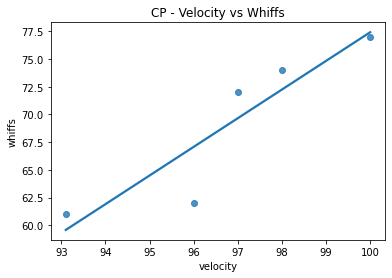

In [12]:
# Show a plot analysis for what insight you discovered depending on the metric used
sns.regplot(x="velocity", y="whiffs", ci=None, data = top5).set(title = 'CP - Velocity vs Whiffs')

### ANSWER: 

By further investigating the top 5 closers with the highest amount of whiffs, there's a strong relationship between velocity and the number of whiffs. Aroldis Chapman's impressive 100 mph velocity explains why he is the leader in whiffs and edges out the runner up, Liam Hendriks, with a velocity of 98 mph.

### INTERPRETATION/OBSERVATION:

This finding builds off of our prior result in question 3. Velocity is shown to be a key metric that is driving a closer's success (greater number of whiffs leads to greater amount of strikes). We've shown that a high vertical release point on average leads to higher velocity and that a higher velocity generates the greatest number of whiffs -> now we can further investigate a closer's release extension to velocity.


# Block 5

### Question: What is the relationship between velocity (90+ mph) and closer release extension? Who has the highest release extension?

### Steps:

* Plot the relationship between velocity and closer release extension
* Create a subset with player name, velocity and release extension and filter for top result

[Text(0.5, 1.0, 'CP - Velocity vs Release Extension')]

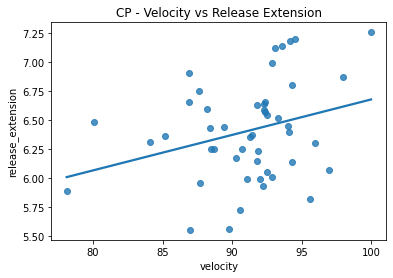

In [13]:
# Create a plot analysis for velocity and closer release extension
sns.regplot(x="velocity", y="release_extension", ci=None, data = cleanCP_df).set(title = 'CP - Velocity vs Release Extension')

In [14]:
# Create a subset with only the player name, velocity and release extension
subset2 = cleanCP_df[['player_name', 'velocity', 'release_extension']]

# Create a function within the subset that sorts the values by release extension
highest_extension = subset2.sort_values('release_extension', ascending=False).head()
highest_extension

,player_name,velocity,release_extension
6,"Chapman, Aroldis",100.0,7.26
22,"Whitlock, Garrett",94.5,7.20
23,"Heuer, Codi",94.2,7.18
2,"Romano, Jordan",93.6,7.14
25,"Jansen, Kenley",93.1,7.12


In [15]:
# Select only the first result
highest_extension.head(1)

,player_name,velocity,release_extension
6,"Chapman, Aroldis",100.0,7.26


### ANSWER: 
There is a positive relationship between release extension and velocity. The closer with the highest release extension is Aroldis Chapman. What's very interesting is that a higher release extension allows a pitcher to shorten the distance it was to pitch to reach home plate. Therefore, we see that closers with a high release extension are able to produce incrementally more velocity on their pitches. On average, this is what the dataset shows in the plot.


### INTERPRETATION/OBSERVATION:

Throughout the problems, each new insight continued to build off one another and explain why certain closers (like Aroldis Chapman) are so effective/dominant. We were able to highlight how vertical release point, number of whiffs and release extension are all important metrics that add to the significance of top velocity as an effective closer in the MLB.
